In [1]:
import numpy as np
import pandas as pd
import time, os, sys
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
import cellpose
from cellpose import utils, io, models, plot
from cellpose.utils import outlines_list, masks_to_outlines
import os, sys
import glob
import cv2
from shapely.geometry import Polygon
import torch
import importlib
importlib.reload(models)

currentdir = os.path.dirname(os.path.realpath('cell_polygons.ipynb'))
parentdir = os.path.dirname(currentdir)
sys.path.append(parentdir)

Downloading: "https://www.cellpose.org/models/cyto_0" to /root/.cellpose/models/cyto_0
100%|██████████| 25.2M/25.2M [00:02<00:00, 10.7MB/s]
Downloading: "https://www.cellpose.org/models/cyto_1" to /root/.cellpose/models/cyto_1
100%|██████████| 25.2M/25.2M [00:02<00:00, 11.0MB/s]
Downloading: "https://www.cellpose.org/models/cyto_2" to /root/.cellpose/models/cyto_2
100%|██████████| 25.2M/25.2M [00:02<00:00, 10.9MB/s]
Downloading: "https://www.cellpose.org/models/cyto_3" to /root/.cellpose/models/cyto_3
100%|██████████| 25.2M/25.2M [00:02<00:00, 10.9MB/s]
Downloading: "https://www.cellpose.org/models/size_cyto_0.npy" to /root/.cellpose/models/size_cyto_0.npy
100%|██████████| 3.55k/3.55k [00:00<00:00, 3.99MB/s]
Downloading: "https://www.cellpose.org/models/cytotorch_0" to /root/.cellpose/models/cytotorch_0
100%|██████████| 25.3M/25.3M [00:02<00:00, 11.2MB/s]
Downloading: "https://www.cellpose.org/models/cytotorch_1" to /root/.cellpose/models/cytotorch_1
100%|██████████| 25.3M/25.3M [00:02

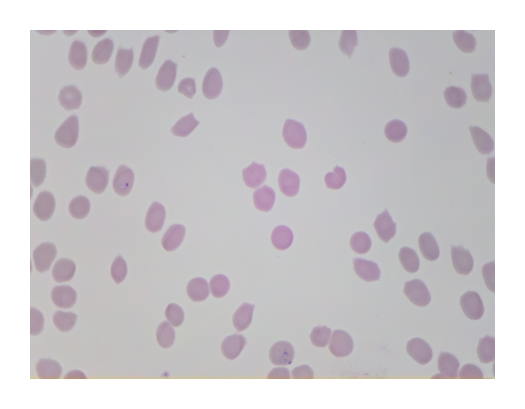

In [2]:
# org_files = ['../data/testing_openflexure/2021-03-05_15-50-16_0_0_5578.jpeg', 
#             '../data/fit_to_circle/cropped_P201_IMG_20151029_162934.png',
#             '../data/fit_to_circle/cropped_P206_IMG_20151112_164625.png',
#             ]
# 

org_files = ['../data/scan_clean/scan_2/2021-03-05_15-50-16_0_640_5554.jpeg'
            ]

# view 1 image
img = io.imread(org_files[0])
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.axis('off')
plt.show()

In [3]:
imgs = [cv2.imread(img_path) for img_path in org_files]

In [4]:
img_height = 1024
img_width = 1024
img_channels = 3
imgs_red = np.zeros((len(imgs), img_height, img_width, img_channels), dtype=np.uint8)
sizes_imgs_red = []
for idx, img in enumerate(imgs):
    img_red = cv2.resize(img, (img_height, img_width))
    #Append image to numpy array
    imgs_red[idx] = img_red
    #Append image shape to numpy array
    sizes_imgs_red.append([img_red.shape[0], img_red.shape[1]])

In [5]:
# RUN CELLPOSE


# DEFINE CELLPOSE MODEL
# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(gpu=True, model_type='cyto')

# or if you have different types of channels in each image
channels = [[0,1], [0,1], [0,0]]

# you can run all in a list e.g.
# >>> imgs = [io.imread(filename) in files]
# >>> masks, flows, styles, diams = model.eval(imgs, diameter=None, channels=channels)
# >>> io.masks_flows_to_seg(imgs, masks, flows, diams, files, channels)
# >>> io.save_to_png(imgs, masks, flows, files)

# or in a loop
# for chan, img in zip(channels, imgs_red):
masks_all = []

for img in imgs_red:
    chan = [0, 0] # for black and white imgs
    #img = io.imread(filename)
    masks, flows, styles, diams = model.eval(img, diameter=50, channels=chan)

    masks_all.append(masks)
    
    # # save results so you can load in gui
    # io.masks_flows_to_seg(img, masks, flows, diams, filename, chan)

    # # save results as png
    # io.save_to_png(img, masks, flows, filename)

TORCH CUDA version not installed/working.
>>>> using CPU
Running test snippet to check if MKL-DNN working
see https://pytorch.org/docs/stable/backends.html?highlight=mkl
** MKL version working - CPU version is sped up. **
processing 1 image(s)
time spent: running network 124.89s; flow+mask computation 3.12
estimated masks for 1 image(s) in 128.12 sec
>>>> TOTAL TIME 128.13 sec


In [9]:
outlines_ls = outlines_list(masks)

def outlines_to_x_y(outlines):
    arr_x = []
    arr_y = []
    for cell in outlines:
        arr_x.append(cell.flatten()[::2])
        arr_y.append(cell.flatten()[1::2])
    return arr_x, arr_y

x, y = outlines_to_x_y(outlines_ls)

x[0]

array([294, 294, 293, 292, 292, 293, 294, 294, 294, 295, 296, 296, 297,
       297, 298, 299, 300, 301, 302, 302, 303, 304, 305, 306, 306, 307,
       308, 309, 310, 311, 312, 313, 314, 315, 316, 316, 317, 318, 319,
       320, 320, 321, 322, 323, 324, 325, 325, 326, 327, 328, 328, 328,
       329, 330, 330, 331, 331, 330, 329, 328, 328, 327, 326, 325, 324,
       323, 322, 321, 320, 319, 318, 317, 316, 315, 314, 313, 312, 311,
       310, 309, 308, 307, 306, 305, 304, 303, 302, 301, 300, 299, 298,
       297, 296, 295])